Mean Squared Error: 7.38


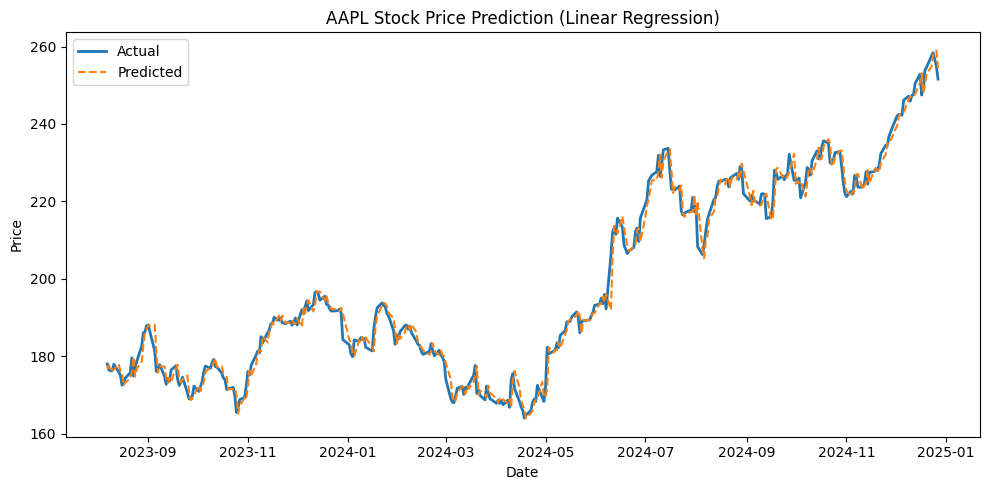

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

ticker = "AAPL"
data = yf.download(ticker, start="2018-01-01", end="2024-12-31", auto_adjust=True, progress=False)

data['Tomorrow_Close'] = data['Close'].shift(-1)
data.dropna(inplace=True)

features = data[['Open', 'High', 'Low', 'Close', 'Volume']]
target = data['Tomorrow_Close']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")

plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label="Actual", linewidth=2)
plt.plot(y_test.index, predictions, label="Predicted", linestyle="--")
plt.title(f"{ticker} Stock Price Prediction (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()